<h1> Creative Programming Assignment</h1>
    
This dataset contains information about the minimum salary, maximum salary, average salary, job description, age of the company in years, etc. offered in job descriptions on Glassdoor. 
It provides detailed information on the location, job title, upper and lower salary, as well as languages needed. This means that I can find out where the highest paying jobs are, who is paying them, and what people need to learn to work there.
    
https://www.kaggle.com/nikhilbhathi/data-scientist-salary-us-glassdoor
    
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib as py
from matplotlib import pyplot as plt

In [2]:
# Import data from .csv file
df = pd.read_csv('data_cleaned_2021.csv')
df
#df.describe

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",Jan-50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


In [3]:
#list(df.index)

In [4]:
#list(df.columns)

<AxesSubplot:ylabel='Frequency'>

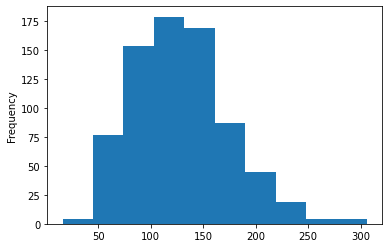

In [5]:
df["Upper Salary"].plot(kind ='hist', x = 'job_title_sim')

What position, on average earns the most?

<AxesSubplot:xlabel='job_title_sim'>

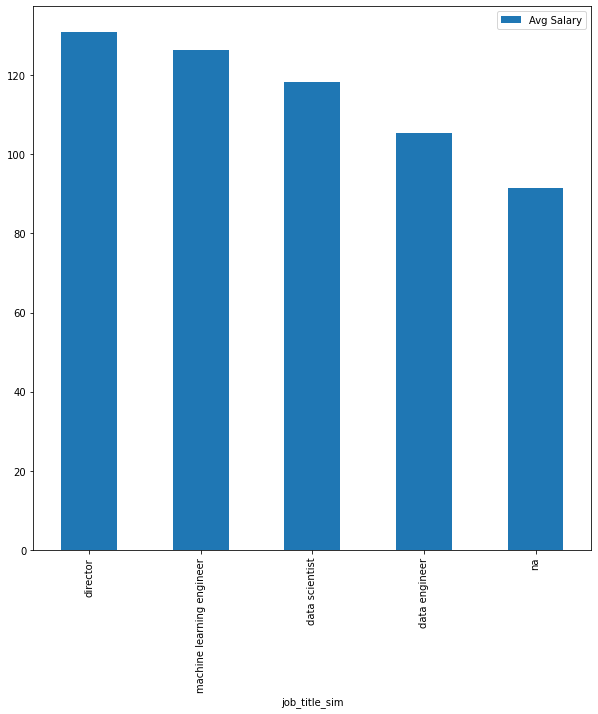

In [6]:
pivot = pd.pivot_table(df, values = ["Avg Salary", "Job Location"], index = ['job_title_sim'])
z = pivot.sort_values(by="Avg Salary", ascending = False).head(5)
z.plot.bar(figsize = (10,10))


What is the most common language needed amongst the highest earning jobs?

<AxesSubplot:ylabel='data scientist'>

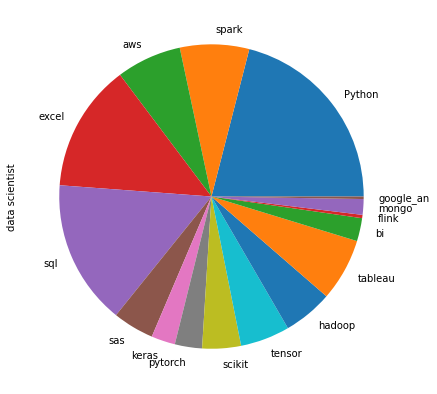

In [16]:
lan = df.groupby(by=["job_title_sim"]).sum()

lan = lan.sort_values(by="Avg Salary", ascending = False).head(5)
lan = lan.iloc[:5, 9:26]
dsp = lan.loc["data scientist"]
dsp.plot.pie(figsize =(7,7))


In [ ]:
dsp = lan.loc["data "]
dsp.plot.pie(figsize =(7,7))

What state(s) are the highest salaries found in?

In [17]:
temp = df.groupby(by=["Avg Salary"]).sum()

temp = temp.sort_values(by="Rating", ascending = False).head(5)
temp = temp.iloc[:5,1:6]
temp


,Rating,Founded,Hourly,Employer provided,Lower Salary
Avg Salary,,,,,
140.0,44.9,21316,0,0,1175
85.0,41.3,19786,0,0,660
107.0,40.6,15659,0,0,790
56.5,37.2,19619,6,0,417
84.5,35.4,19754,0,0,558
